In [1]:
# General Imports
import numpy as np
import pandas as pd

#Visualization imports
import matplotlib.pyplot as plt

# Scikit Imports
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

In [2]:
#Reading the csv file
df = pd.read_csv('audit_risk.csv')

In [3]:
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.89,16,1.19,0.4,0.476,12.88,0.6,7.728,14.07,5.0,...,1.2,0,0.2,0.0,3.8,10.870,1.2,0.5,6.5220,1
97,3.89,16,0.00,0.2,0.000,2.72,0.2,0.544,2.72,5.0,...,1.2,0,0.2,0.0,2.6,4.976,1.2,0.5,2.9856,1
98,3.89,16,0.00,0.2,0.000,1.66,0.2,0.332,1.66,5.0,...,1.2,0,0.2,0.0,2.4,2.684,1.2,0.5,1.6104,1
99,3.89,16,6.47,0.6,3.882,12.18,0.6,7.308,18.65,5.0,...,1.2,0,0.2,0.0,4.4,28.552,1.2,0.5,17.1312,1


In [4]:
#Checking if there are any null values
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [5]:
#X is the dataframe which consist of independent features
X = df.drop(['LOCATION_ID', 'Risk'], axis = 'columns')
X

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.89,1.19,0.4,0.476,12.88,0.6,7.728,14.07,5.0,0.2,...,0.2,1.2,0,0.2,0.0,3.8,10.870,1.2,0.5,6.5220
97,3.89,0.00,0.2,0.000,2.72,0.2,0.544,2.72,5.0,0.2,...,0.2,1.2,0,0.2,0.0,2.6,4.976,1.2,0.5,2.9856
98,3.89,0.00,0.2,0.000,1.66,0.2,0.332,1.66,5.0,0.2,...,0.2,1.2,0,0.2,0.0,2.4,2.684,1.2,0.5,1.6104
99,3.89,6.47,0.6,3.882,12.18,0.6,7.308,18.65,5.0,0.2,...,0.2,1.2,0,0.2,0.0,4.4,28.552,1.2,0.5,17.1312


In [6]:
#y is our dependent feature. Class 1 represents Fradulent Firms
y = df['Risk']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [7]:
# Split dataset
sample_train, sample_test, label_train, label_test = train_test_split(
     X, y, test_size=0.2, random_state=22)

# Reduce dimensions
n_dim = 4
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)

# Normalise
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)

# Scale
samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)

# Select
train_size = 81
sample_train = sample_train[:train_size]
label_train = label_train[:train_size]

test_size = 20
sample_test = sample_test[:test_size]
label_test = label_test[:test_size]

In [8]:
#The clssical data is encoded into the quantum state space with the help of the quantum feature map, ZZFeatureMap 
zz_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement='linear', insert_barriers=True)

In [9]:
#We perform Quantum Kernel Estimation 
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))

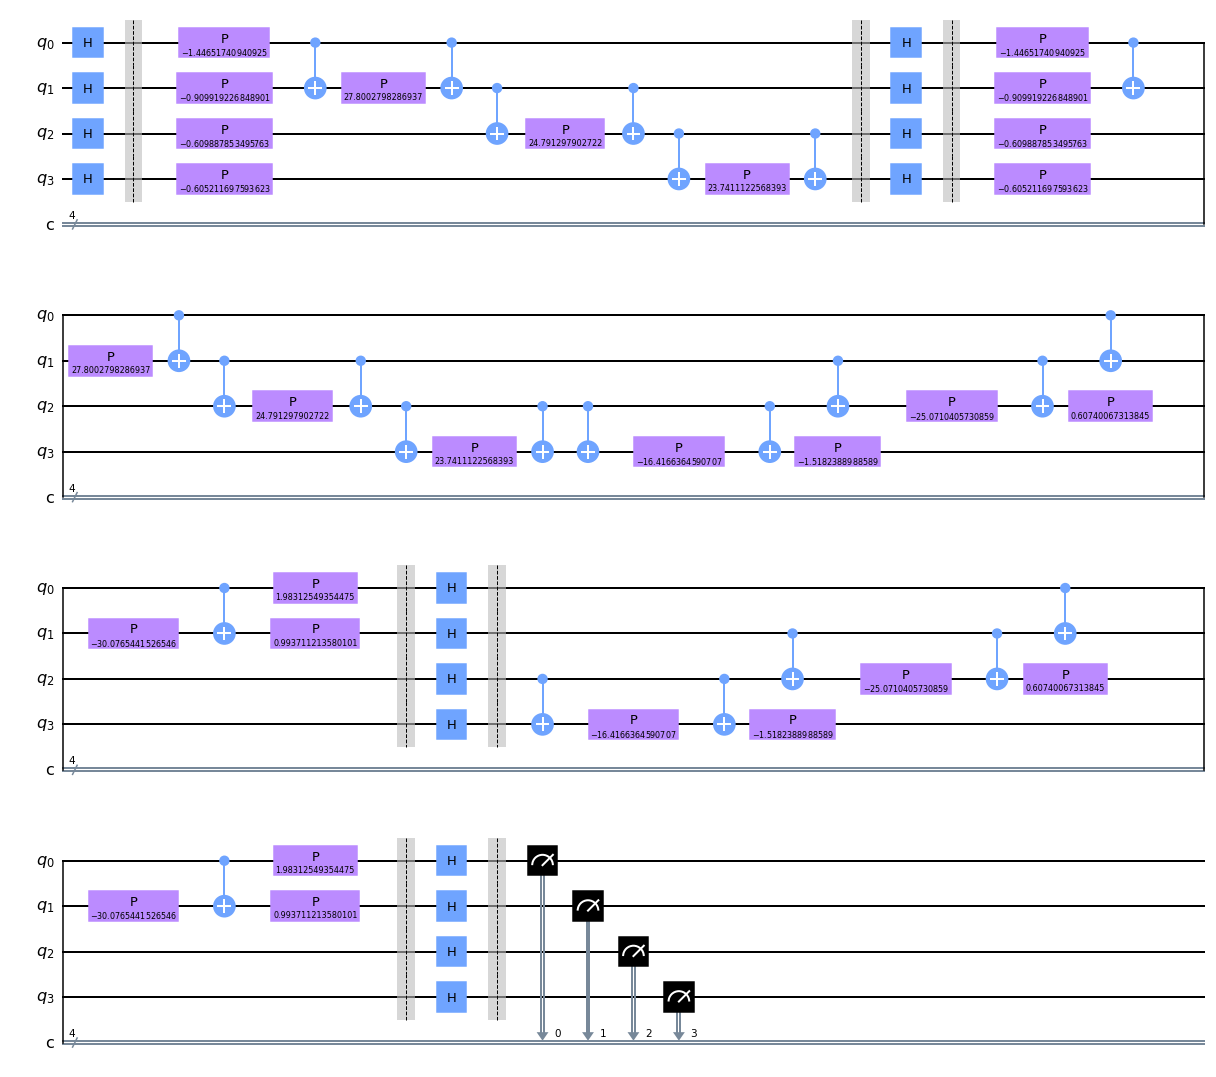

In [10]:
zz_circuit = zz_kernel.construct_circuit(sample_train[0], sample_train[1])
zz_circuit.decompose().decompose().draw(output='mpl')

In [11]:
#The training are testing quantum kernel matrices are evaluated
matrix_train = zz_kernel.evaluate(x_vec=sample_train)
matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

In [12]:
#The training and testing quantum kernel matrices are used in classical support vector machine classification algorithm
zzcb_svc = SVC(kernel=zz_kernel.evaluate)
zzcb_svc.fit(sample_train, label_train)
zzcb_score = zzcb_svc.score(sample_test, label_test)

In [13]:
zzcb_score

0.9

In [14]:
#For comparision, classical kernels are also used
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(sample_train, label_train)
    classical_score = classical_svc.score(sample_test, label_test)
    print(classical_score)

0.55
0.85
0.75
0.65
